# Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Date and Time Data Types and Tools

In [2]:
from datetime import datetime

In [4]:
now = datetime.now()
now

datetime.datetime(2018, 10, 13, 13, 9, 29, 544000)

In [5]:
now.year, now.month, now.day

(2018, 10, 13)

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(926, 56700)

In [7]:
delta.days, delta.seconds

(926, 56700)

In [8]:
from datetime import timedelta

In [9]:
start = datetime(2011, 1, 7)

In [10]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

## Time Series Basics

In [11]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02    0.435015
2011-01-05   -0.737736
2011-01-07   -1.754524
2011-01-08   -0.012276
2011-01-10   -2.488025
2011-01-12    0.952016
dtype: float64

In [50]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

### Indexing, Selection, Subsetting

In [12]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts
longer_ts['2001']

2001-01-01    0.792678
2001-01-02   -0.475390
2001-01-03   -1.248960
2001-01-04    1.646821
2001-01-05    1.175347
2001-01-06    2.671052
2001-01-07   -0.114454
2001-01-08    0.042921
2001-01-09   -1.378837
2001-01-10    1.655826
2001-01-11    1.172922
2001-01-12    0.505110
2001-01-13    1.058827
2001-01-14   -0.210725
2001-01-15   -0.557554
2001-01-16    0.561606
2001-01-17   -0.251837
2001-01-18   -0.099616
2001-01-19   -0.698147
2001-01-20   -0.909229
2001-01-21    0.461231
2001-01-22   -0.083794
2001-01-23   -0.041619
2001-01-24   -0.914150
2001-01-25    0.002702
2001-01-26   -0.460353
2001-01-27    0.852923
2001-01-28   -0.511717
2001-01-29   -0.818430
2001-01-30    1.435865
                ...   
2001-12-02    0.561957
2001-12-03   -1.176788
2001-12-04    0.534263
2001-12-05    0.266205
2001-12-06    1.089227
2001-12-07    1.975709
2001-12-08   -0.694033
2001-12-09    1.333748
2001-12-10    0.205043
2001-12-11   -0.353938
2001-12-12    0.229270
2001-12-13   -0.002273
2001-12-14 

In [52]:
longer_ts['2001-05']

2001-05-01    1.399865
2001-05-02    0.725534
2001-05-03    0.604917
2001-05-04    0.513060
2001-05-05    0.953247
2001-05-06    1.330386
2001-05-07    0.154717
2001-05-08   -0.680445
2001-05-09   -0.567711
2001-05-10   -0.922889
2001-05-11    0.314985
2001-05-12   -0.053462
2001-05-13   -0.360634
2001-05-14   -0.619329
2001-05-15    1.525970
2001-05-16    2.649081
2001-05-17    0.049861
2001-05-18   -0.781079
2001-05-19   -2.241122
2001-05-20    0.698585
2001-05-21   -0.350151
2001-05-22    0.869276
2001-05-23    0.023584
2001-05-24    0.476180
2001-05-25    0.651059
2001-05-26   -0.885583
2001-05-27    0.754425
2001-05-28   -0.237062
2001-05-29   -1.372586
2001-05-30   -0.027991
2001-05-31   -2.742878
Freq: D, dtype: float64

In [53]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.592182
2011-01-08    0.281295
2011-01-10    0.875277
2011-01-12    0.425398
dtype: float64

In [54]:
ts
ts['1/6/2011':'1/11/2011']

2011-01-07    1.592182
2011-01-08    0.281295
2011-01-10    0.875277
dtype: float64

In [55]:
ts.truncate(after='1/9/2011')

2011-01-02    0.062180
2011-01-05    1.589658
2011-01-07    1.592182
2011-01-08    0.281295
dtype: float64

In [14]:
close_px_all = pd.read_csv('stock_px_2.csv')
close_px_all.head(2)

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59


In [15]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px.head(2)

,AAPL,MSFT,XOM
0,7.40,21.11,29.22
1,7.45,21.14,29.24


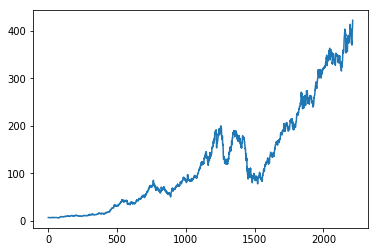

In [60]:
close_px.AAPL.plot()

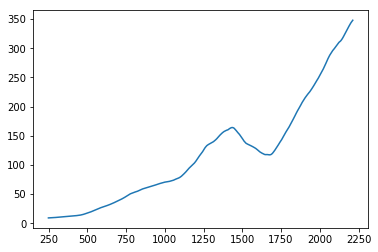

In [61]:
close_px.AAPL.rolling(250).mean().plot()

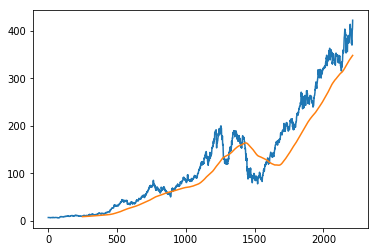

In [16]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [17]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

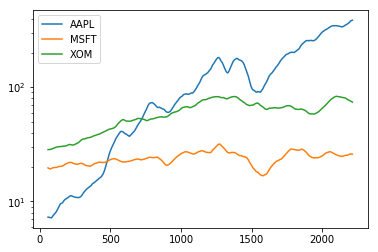

In [18]:
close_px.rolling(60).mean().plot(logy=True)